In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE

In [48]:
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [49]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [51]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [52]:
df.index

RangeIndex(start=0, stop=4177, step=1)

In [53]:
df.shape

(4177, 9)

In [54]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [55]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [79]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

C:\Users\VARMA\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='count'>

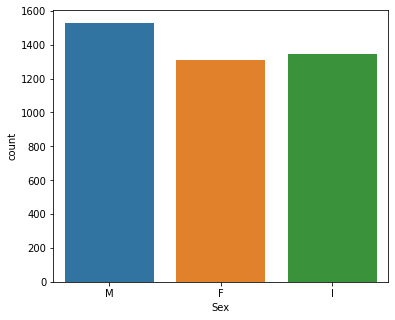

In [56]:
plt.figure(figsize=(6,5))
sns.countplot(df['Sex'])

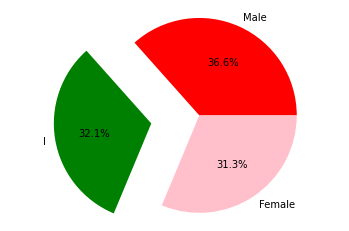

In [57]:
numbers= [df['Sex'].value_counts()[0], df['Sex'].value_counts()[1], df['Sex'].value_counts()[2]]
labels = ['Male', 'I', 'Female']
colors = ['r', 'g', 'pink']
plt.pie(numbers, labels=labels, colors=colors, explode=[0, 0.5,0], autopct = '%1.1f%%' )
plt.axis('equal')
plt.show()

# Missing values:

In [58]:
df.isnull().sum() #There are no missing  values in the data

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [59]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# Encoding the data labels 

In [60]:
#Encoding the labels in Sex column through One hot encoding or creating dummies 
# The target column is Rings, so converting sex column in to get_dummies 
df = pd.get_dummies(df)
df.head()
#The two columns has been increased from the orginal columns 
print ('After encoded the number of columns are:', len(df.columns))

After encoded the number of columns are: 11


# Univariate analysis : 

***** Length


C:\Users\VARMA\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


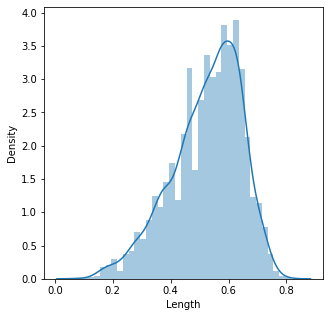

***** Diameter


C:\Users\VARMA\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


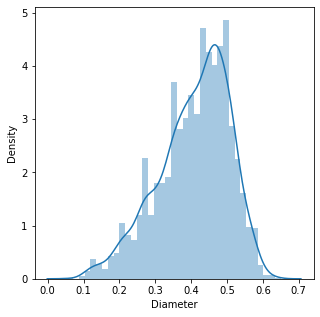

***** Height


C:\Users\VARMA\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


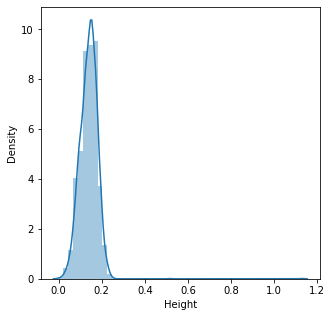

***** Whole weight


C:\Users\VARMA\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


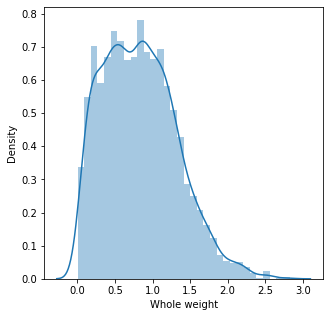

***** Shucked weight


C:\Users\VARMA\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


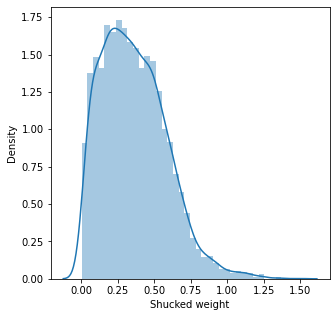

C:\Users\VARMA\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


***** Viscera weight


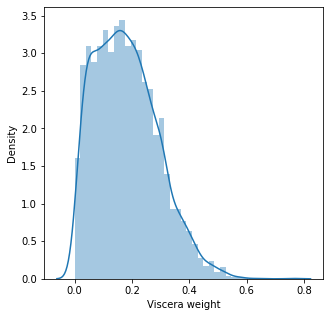

***** Shell weight


C:\Users\VARMA\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


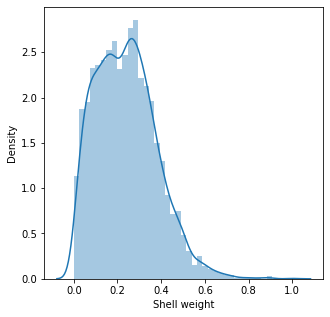

C:\Users\VARMA\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


***** Rings


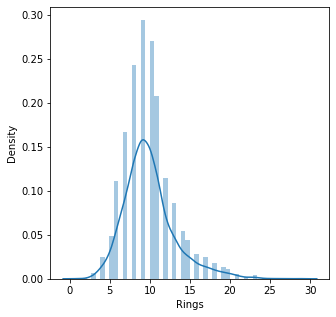

In [61]:
cols = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']
for i in cols:
    print('*****',i)
    plt.figure(figsize=(5,5))
    sns.distplot(df[i])
    plt.show()

# Outliers: 

***** Length


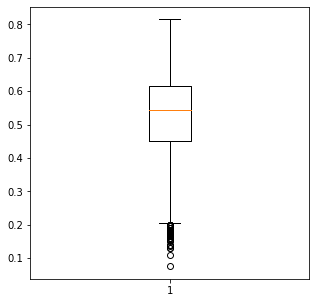

***** Diameter


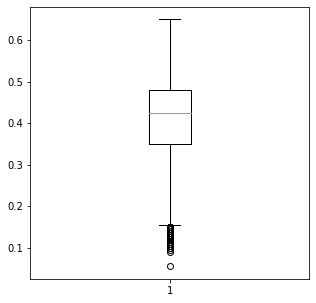

***** Height


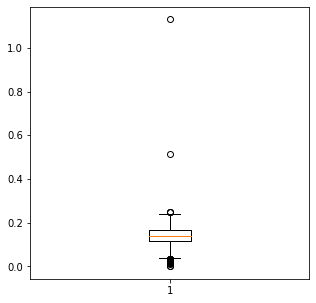

***** Whole weight


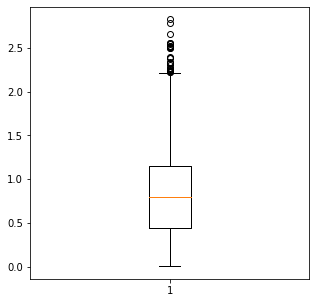

***** Shucked weight


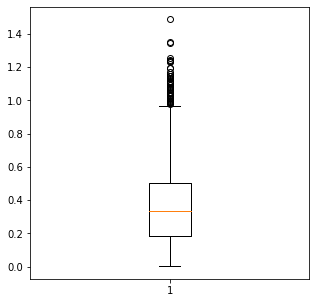

***** Viscera weight


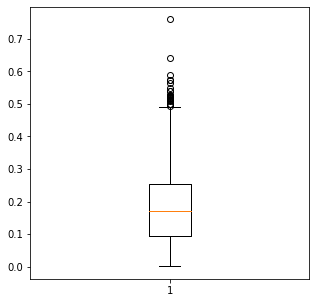

***** Shell weight


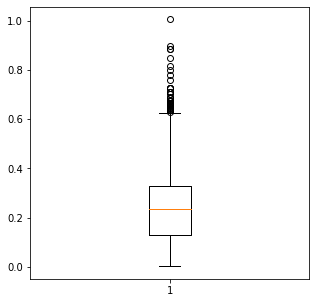

***** Rings


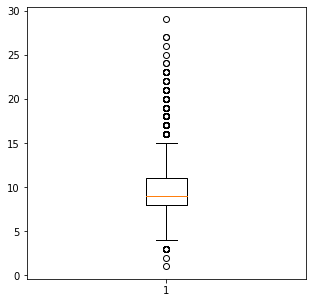

In [62]:
cols = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']
for i in cols:
    print('*****',i)
    plt.figure(figsize=(5,5))
    plt.boxplot(df[i])
    plt.show()

In [64]:
from scipy.stats import skew, kurtosis
for i in cols:
    print('*****',i)
    sk=skew(df[i])
    kurt=kurtosis(df[i])
    print('skew value of', i,' =', sk)
    print('kurtosis value of', i,' =', kurt)
    print('*****')


***** Length
skew value of Length  = -0.6396434615451078
kurtosis value of Length  = 0.06310755265972467
*****
***** Diameter
skew value of Diameter  = -0.6089793517180232
kurtosis value of Diameter  = -0.04685725781261718
*****
***** Height
skew value of Height  = 3.127693679207538
kurtosis value of Height  = 75.93309871329375
*****
***** Whole weight
skew value of Whole weight  = 0.5307678720133928
kurtosis value of Whole weight  = -0.025051305562984627
*****
***** Shucked weight
skew value of Shucked weight  = 0.7188396611678955
kurtosis value of Shucked weight  = 0.592975441564509
*****
***** Viscera weight
skew value of Viscera weight  = 0.5916395905344529
kurtosis value of Viscera weight  = 0.08247512417944991
*****
***** Shell weight
skew value of Shell weight  = 0.6207038222275745
kurtosis value of Shell weight  = 0.5298535134982196
*****
***** Rings
skew value of Rings  = 1.1137017739656028
kurtosis value of Rings  = 2.3264623620128333
*****


In [65]:
#All the columns doesn't have much outliers , however hight column kurtosis value is large , indicating the very big amount outlier is there. 

In [66]:
def outlier_iqr(input_data):
    q1=input_data.quantile(0.25)
    q3=input_data.quantile(0.75)
    iqr = q3-q1
    lower_whisker = q1-(1.5*iqr)
    upper_whisker = q3+(1.5*iqr)
    outlier_list = []
    for i in input_data:
        if i>upper_whisker or i<lower_whisker:
            outlier_list.append(i)
    print ('outliers are', outlier_list)
    print ('lower_whisker value :', lower_whisker, 'upper_whisker value', upper_whisker)
    return ('lower_whisker value :', lower_whisker, 'upper_whisker value', upper_whisker)

In [67]:
#Quantifying Outliers
for i in cols:
    print('*****',i)
    outlier_iqr(df[i])
    print('*****')

***** Length
outliers are [0.175, 0.17, 0.075, 0.13, 0.11, 0.16, 0.2, 0.165, 0.19, 0.175, 0.2, 0.175, 0.155, 0.195, 0.165, 0.155, 0.18, 0.15, 0.16, 0.185, 0.195, 0.195, 0.2, 0.185, 0.14, 0.185, 0.135, 0.16, 0.13, 0.18, 0.165, 0.19, 0.17, 0.18, 0.175, 0.155, 0.2, 0.19, 0.18, 0.2, 0.2, 0.165, 0.19, 0.165, 0.175, 0.17, 0.14, 0.16, 0.185]
lower_whisker value : 0.20250000000000004 upper_whisker value 0.8624999999999999
*****
***** Diameter
outliers are [0.15, 0.15, 0.13, 0.13, 0.055, 0.1, 0.09, 0.12, 0.145, 0.12, 0.145, 0.125, 0.15, 0.14, 0.125, 0.11, 0.145, 0.11, 0.105, 0.125, 0.1, 0.11, 0.14, 0.12, 0.13, 0.15, 0.135, 0.105, 0.135, 0.13, 0.11, 0.15, 0.095, 0.13, 0.115, 0.13, 0.15, 0.125, 0.125, 0.135, 0.115, 0.145, 0.15, 0.14, 0.15, 0.135, 0.15, 0.145, 0.125, 0.13, 0.12, 0.15, 0.15, 0.125, 0.13, 0.105, 0.105, 0.12, 0.135]
lower_whisker value : 0.15499999999999997 upper_whisker value 0.675
*****
***** Height
outliers are [0.01, 0.03, 0.03, 0.035, 0.03, 0.02, 0.035, 0.025, 0.025, 0.015, 0.0,

# Imputing the Outliers
There are some outliers in the data columns
The outliers are only slight amount


In [94]:
df['Length']=df['Length'].mask(df['Length']<0.2,df['Length'].mean()) 
df['Diameter']=df['Diameter'].mask(df['Diameter']<0.154,df['Diameter'].mean()) 
df['Height']=df['Height'].mask(df['Height']>0.24,df['Height'].mean())
df['Shucked weight']=df['Shucked weight'].mask(df['Shucked weight']>0.976,df['Shucked weight'].mean())
df['Rings']=df['Rings'].mask(df['Rings']>15.5,df['Rings'].mean())


In [95]:
#Feature Engineering 
corr = df.corr()
corr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
Length,1.000000,0.971075,0.860809,0.919176,0.885828,0.897258,0.889710,0.580909,0.303387,-0.543232,0.234606
Diameter,0.971075,1.000000,0.854886,0.914694,0.876364,0.889264,0.892428,0.580296,0.310049,-0.551899,0.236595
Height,0.860809,0.854886,1.000000,0.884116,0.827602,0.861888,0.885702,0.635018,0.316193,-0.558057,0.236650
Whole weight,0.919176,0.914694,0.884116,1.000000,0.919878,0.966375,0.955355,0.566927,0.299741,-0.557592,0.252038
Shucked weight,0.885828,0.876364,0.827602,0.919878,1.000000,0.890280,0.855165,0.493109,0.285908,-0.532647,0.241170
Viscera weight,0.897258,0.889264,0.861888,0.966375,0.890280,1.000000,0.907656,0.556720,0.308444,-0.556081,0.242194
Shell weight,0.889710,0.892428,0.885702,0.955355,0.855165,0.907656,1.000000,0.604659,0.306319,-0.546953,0.235391
Rings,0.580909,0.580296,0.635018,0.566927,0.493109,0.556720,0.604659,1.000000,0.265663,-0.487060,0.216462
Sex_F,0.303387,0.310049,0.316193,0.299741,0.285908,0.308444,0.306319,0.265663,1.000000,-0.464298,-0.512528
Sex_I,-0.543232,-0.551899,-0.558057,-0.557592,-0.532647,-0.556081,-0.546953,-0.487060,-0.464298,1.000000,-0.522541


<AxesSubplot:>

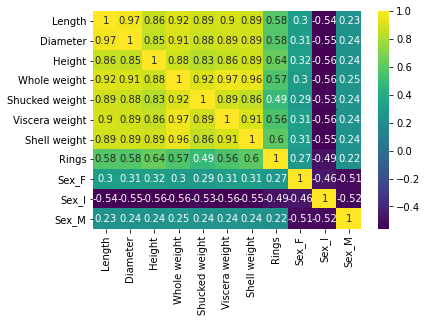

In [96]:
sns.heatmap(corr, annot=True, cmap='viridis')

In [97]:
#All the features are showing signficant corelation with the Target Rings, so considering the all columns for further model building

In [98]:
#Data conversion in to Numpy

x = df.drop('Rings', axis=1)
x_data=np.array(x)
y = df['Rings']
y_data=np.array(y)

In [99]:
x_data

array([[0.455, 0.365, 0.095, ..., 0.   , 0.   , 1.   ],
       [0.35 , 0.265, 0.09 , ..., 0.   , 0.   , 1.   ],
       [0.53 , 0.42 , 0.135, ..., 1.   , 0.   , 0.   ],
       ...,
       [0.6  , 0.475, 0.205, ..., 0.   , 0.   , 1.   ],
       [0.625, 0.485, 0.15 , ..., 1.   , 0.   , 0.   ],
       [0.71 , 0.555, 0.195, ..., 0.   , 0.   , 1.   ]])

In [100]:
y_data

array([15.,  7.,  9., ...,  9., 10., 12.])

In [101]:
#Data Splitting
x_train,x_test, y_train, y_test=train_test_split(x_data,y_data, test_size=0.20, random_state=25)
x_train

array([[0.32 , 0.24 , 0.085, ..., 0.   , 1.   , 0.   ],
       [0.545, 0.43 , 0.14 , ..., 1.   , 0.   , 0.   ],
       [0.515, 0.405, 0.13 , ..., 0.   , 1.   , 0.   ],
       ...,
       [0.62 , 0.475, 0.15 , ..., 1.   , 0.   , 0.   ],
       [0.645, 0.495, 0.185, ..., 0.   , 0.   , 1.   ],
       [0.58 , 0.455, 0.155, ..., 1.   , 0.   , 0.   ]])

In [102]:
#Model Development

In [103]:
from sklearn.linear_model import LinearRegression


In [104]:
#create a model object
model=LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [105]:
#Training
model.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [106]:
print ('intercept value for model', model.intercept_)
print ('slope value for model', model.coef_)


intercept value for model 3.626376155772629
slope value for model [ 4.01392657  0.45738631 29.50958955 -1.59396638 -2.88591326  1.64038497
  5.94718808  0.32806576 -0.63365138  0.30558563]


In [107]:
y_pred=model.predict(x_test)
y_pred

array([ 7.96883269,  9.97406883,  9.20251658,  9.86032958,  9.07115023,
        8.43958247,  9.79801452, 11.61579394,  9.24792557, 10.0573443 ,
        7.73103432, 10.64256407,  9.60965297,  7.92146112,  9.1873966 ,
       10.64654847, 10.94759039,  9.87217958,  9.88813346, 10.26494884,
       11.58933622, 10.24729774, 11.29456925,  7.77990674,  7.75023714,
       10.93144791, 12.43741285,  8.63552424, 10.01133665, 10.68918889,
        9.00977459,  6.26126416, 11.74017105,  8.99707927,  9.62889857,
        8.30214902, 10.09558197, 10.72205001, 13.01165211, 10.09180734,
       10.65738939, 10.71769451,  9.04143137, 10.32735378, 10.42773048,
        8.31220771,  8.86718575, 10.76879976, 11.37209162,  6.7490103 ,
        9.85220596,  9.75060322,  9.56549694, 10.32726553, 12.59282755,
       10.25453379,  7.89451385,  7.04108629,  9.8758359 , 10.01824273,
       10.34391317,  9.4664728 , 11.49824897, 10.45685147,  8.67969062,
        8.27639423,  6.35821508,  7.94661412,  7.27868308, 11.13

In [108]:
df2=pd.DataFrame({'actual value':y_test, 'predicted value': y_pred})
df2.head() 

,actual value,predicted value
0,7.0,7.968833
1,14.0,9.974069
2,12.0,9.202517
3,10.0,9.860330
4,8.0,9.071150


In [109]:
model.score(x_test, y_test)*100

43.543310451553864

In [110]:
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE

In [112]:
mean_squared_error(y_pred, y_test)

2.7770046510799338

In [113]:
import math
math.sqrt(mean_squared_error(y_pred, y_test))

1.666434712516495